In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_theme(style="white")

In [3]:
#Export cleaned dataset
data = pd.read_csv("dataset_cleaned_UTS.csv")

In [4]:
data.describe()

,Su,Sy,E,G,mu,Ro
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,572.753222,387.010309,164571.520619,85598.840206,0.302977,6929.843428
std,326.834927,289.482497,56135.405867,125326.800138,0.024590,2115.171710
min,69.000000,28.000000,73000.000000,26000.000000,0.200000,1750.000000
25%,340.000000,205.000000,105000.000000,40000.000000,0.300000,7160.000000
50%,500.000000,305.000000,206000.000000,79000.000000,0.300000,7860.000000
75%,705.000000,470.000000,206000.000000,80000.000000,0.320000,7860.000000
max,2220.000000,2048.000000,219000.000000,769000.000000,0.350000,8930.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Std       1552 non-null   object 
 1   Material  1552 non-null   object 
 2   Su        1552 non-null   int64  
 3   Sy        1552 non-null   int64  
 4   E         1552 non-null   int64  
 5   G         1552 non-null   int64  
 6   mu        1552 non-null   float64
 7   Ro        1552 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 97.1+ KB


In [6]:
data.head()

,Std,Material,Su,Sy,E,G,mu,Ro
0,ANSI,Steel SAE 1015,421,314,207000,79000,0.3,7860
1,ANSI,Steel SAE 1015,424,324,207000,79000,0.3,7860
2,ANSI,Steel SAE 1015,386,284,207000,79000,0.3,7860
3,ANSI,Steel SAE 1020,448,331,207000,79000,0.3,7860
4,ANSI,Steel SAE 1020,441,346,207000,79000,0.3,7860


In [7]:
#Drop Std and material columns due to its object value. Su column also dropped to reducre the potential of data leak during the process
X = data.drop(["Std", "Material", "Su"], axis=1)
y = data["Su"]

In [8]:
#import libraries
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [9]:
from sklearn.preprocessing import StandardScaler

#Standarize each columns to remove the mean and scalling the variance
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 1.93030468,  0.63928791, -0.07772134, -0.1262336 ,  0.42592898],
       [-0.32020346,  0.63928791, -0.07772134, -0.1262336 ,  0.43061717],
       [-0.66669938, -1.6127013 , -0.47068036,  1.07881174, -1.96973572],
       ...,
       [-0.48830544,  0.85207429, -0.03919594, -0.52791538,  0.44890111],
       [-0.50202805, -0.77928797, -0.32428386,  0.67712996,  0.89005971],
       [-0.98575008, -1.13393194, -0.38592449,  1.48049352,  0.74941404]])

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#baseline
y_baseline = np.ones(len(y_train)) * y_train.mean()

# Predict using the train data
y_pred_train_mean = y_baseline

# Calculate R-squared
r2_baseline = r2_score(y_train, 
                       y_pred_train_mean)

#calculate MAE
mae_baseline = mean_absolute_error(y_train, 
                                   y_pred_train_mean)

print(mae_baseline)
print(r2_baseline)

244.7387780253117
0.0


In [12]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1)
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

#predict using existing data
y_pred_train_lr_model = lr_model.predict(X_train)

#calculate mean absolute error
mae_linreg = mean_absolute_error(y_train, 
                                 y_pred_train_lr_model)

# Calculate R-squared
r2_lrmodel = r2_score(y_train, 
                       y_pred_train_lr_model)

print(mae_linreg)
print(r2_lrmodel)

59.94321056387492
0.9482189550512403


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Build random forest
grad_tree = GradientBoostingRegressor(random_state = 1)

# Fit random forest
grad_tree.fit(X_train, y_train)

# Predict
y_pred_train_gb = grad_tree.predict(X_train)

# Calculate mean absolute error
mae_gb = mean_absolute_error(y_train, 
                             y_pred_train_gb)

# Calculate R-squared
r2_gb = r2_score(y_train, 
                 y_pred_train_gb)
print(mae_gb)
print(r2_gb)

42.705805219227805
0.9709966522039388


In [15]:
#gridsearch
from sklearn.model_selection import GridSearchCV 

params = {'n_estimators': [50, 100, 200, 500, 1000],
              'learning_rate': [0.1, 0.05, 0.01]}

# Buat gridsearch
grad_tree = GradientBoostingRegressor(random_state = 1)

grad_tree_cv = GridSearchCV(estimator = grad_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")
# Fit grid search cv
grad_tree_cv.fit(X_train, 
                 y_train)

# Best params
grad_tree_cv.best_params_

{'learning_rate': 0.05, 'n_estimators': 1000}

In [16]:
# Refit the GB
grad_tree = GradientBoostingRegressor(n_estimators = 1000,
                                      learning_rate=0.05,
                                      random_state = 1)

grad_tree.fit(X_train, 
              y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, random_state=1)

In [17]:
# Predict
y_pred_train_gbcv = grad_tree.predict(X_train)

# Calculate mean absolute error
mae_gb_cv = mean_absolute_error(y_train, 
                                y_pred_train_gbcv)

# Calculate R-squared
r2_gb_cv = r2_score(y_train, 
                    y_pred_train_gbcv)

print(mae_gb_cv)
print(r2_gb_cv)

31.65906170485857
0.9816320982040763


In [18]:
# Build random forest
from sklearn.ensemble import RandomForestRegressor
rf_tree = RandomForestRegressor(n_estimators = 1000,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 1)

# Fit random forest
rf_tree.fit(X_train, 
            y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1000, random_state=1)

In [19]:
# Predict
y_pred_train_rf = rf_tree.predict(X_train)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_train, 
                             y_pred_train_rf)

# Calculate R-squared
r2_rf = r2_score(y_train, 
                 y_pred_train_rf)

print(mae_rf)
print(r2_rf)

27.671545429309575
0.984896670722295


In [20]:
#gridsearch for random forest
params = {"n_estimators": [50, 100, 200, 500, 1000],
          "max_features": ["sqrt", "log2"]}

# Buat gridsearch
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                random_state = 1)

rf_tree_cv = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")
# Fit grid search cv
rf_tree_cv.fit(X_train, 
               y_train)

# Best params
rf_tree_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [21]:
# Refit the Random Forest
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = 'sqrt',
                                n_estimators = 100,
                                random_state = 1)

#refit
rf_tree.fit(X_train, 
            y_train)

RandomForestRegressor(max_features='sqrt', random_state=1)

In [22]:
# Predict
y_pred_train_rfcv = rf_tree.predict(X_train)

# Calculate mean absolute error
mae_rf_cv = mean_absolute_error(y_train, 
                                y_pred_train_rfcv)

# # Calculate R-squared
r2_rf_cv = r2_score(y_train, 
                    y_pred_train_rfcv)

print(mae_rf_cv)
print(r2_rf_cv)

27.69335595553668
0.9847580895514483


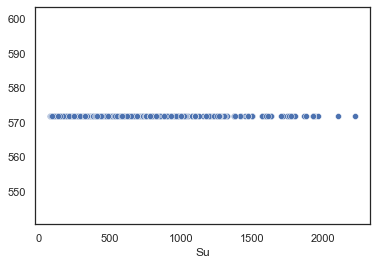

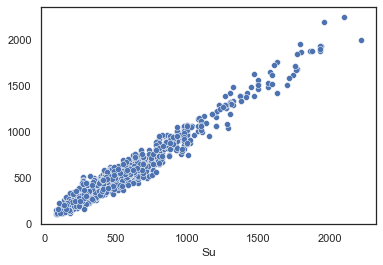

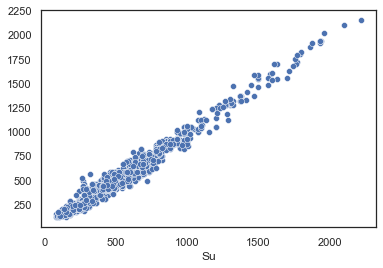

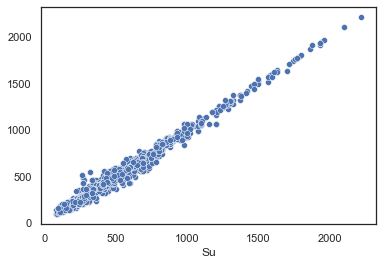

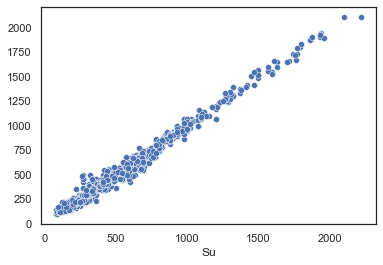

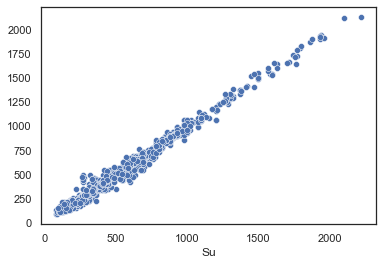

In [23]:
sns.scatterplot(x=y_train, 
                y=y_pred_train_mean)
plt.show()
sns.scatterplot(x=y_train, 
                y=y_pred_train_lr_model)
plt.show()
sns.scatterplot(x=y_train, 
                y=y_pred_train_gb)
plt.show()
sns.scatterplot(x=y_train, 
                y=y_pred_train_gbcv)
plt.show()
sns.scatterplot(x=y_train, 
                y=y_pred_train_rf)
plt.show()
sns.scatterplot(x=y_train, 
                y=y_pred_train_rfcv)
plt.show()

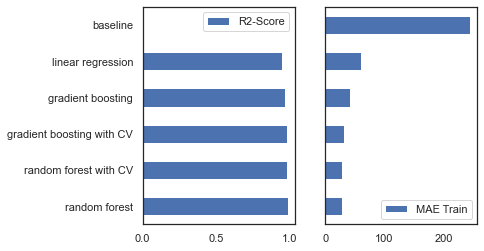

In [24]:
r2_score = [r2_baseline, r2_lrmodel, 
            r2_gb, r2_rf, r2_gb_cv, 
            r2_rf_cv]

mae_score = [mae_baseline, mae_linreg, 
             mae_gb, mae_rf, mae_gb_cv, 
             mae_rf_cv]

indexes = ["baseline", "linear regression", 
           "gradient boosting", "random forest",
           "gradient boosting with CV", 
           "random forest with CV"]

summary_df = pd.DataFrame({
    "MAE Train": mae_score,
    "R2-Score": r2_score,
},index = indexes)

#plotting
fig, axs = plt.subplots(ncols=2, 
                        nrows=1, 
                        figsize=(6,4), 
                        sharey=True)

summary_df.sort_values(by='R2-Score', 
                       ascending=False).plot(kind='barh', 
                                             y='R2-Score', 
                                             ax=axs[0])

summary_df.sort_values(by='R2-Score', 
                       ascending=False).plot(kind='barh', 
                                             y='MAE Train', 
                                             ax=axs[1])
plt.show()

In [25]:
summary_df.applymap(lambda x: round(x, 2))

,MAE Train,R2-Score
baseline,244.74,0.00
linear regression,59.94,0.95
gradient boosting,42.71,0.97
random forest,27.67,0.98
gradient boosting with CV,31.66,0.98
random forest with CV,27.69,0.98


## Feature Importance

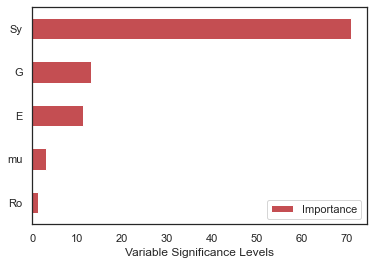

In [26]:
Importance = pd.DataFrame({"Importance": rf_tree.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r");

plt.xlabel("Variable Significance Levels");

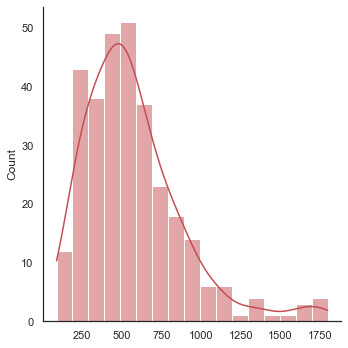

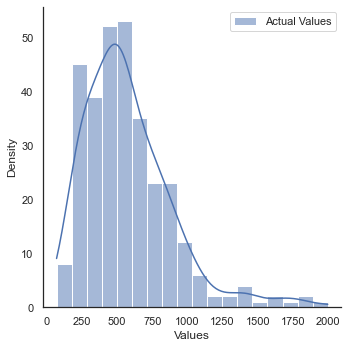

In [27]:
# Plotting the predicted values
predicted_values = rf_tree.predict(X_test)
sns.displot(predicted_values, kde=True, color="r", label="Predicted Values")

# Plotting the actual values
sns.displot(y_test, kde=True, color="b", label="Actual Values")

# Adding labels and legend
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

# Display the plot
plt.show()
#In the updated code, displot is used instead of distplot to create density plots (histograms with kernel density estimation). The kde parameter is set to True to include the kernel density estimate in the plot. The colors and labels are maintained as in your original code.
#Remember to import seaborn and matplotlib.pyplot before running this code.

#ax1 = sns.distplot(rf_tree.predict(X_test), hist=False, color="r", label="Predict Values")
#sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);